In [44]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sys import getsizeof

%matplotlib inline

In [41]:
# I'm limited by RAM here and taking the first N rows is likely to be
# a bad idea for the date data since it is ordered.
# Sample the data in a roundabout way:


def load_chunk(chunk_size=1000, n_chunk=2, frac_chunk=0.05):
    
    date_chunks = pd.read_csv("data/train_date.csv.zip", index_col=0, chunksize=chunk_size, dtype=np.float32)
    num_chunks = pd.read_csv("data/train_numeric.csv.zip", index_col=0,
                         usecols=list(range(969)), chunksize=chunk_size, dtype=np.float32)
    cat_chunks = pd.read_csv('data/train_categorical.csv.zip', index_col=0, chunksize=chunk_size)
    
    n = 0
    tmp = []
    for dchunk, nchunk, cchunk in zip(date_chunks, num_chunks, cat_chunks):
        tmp.append(pd.concat([dchunk, nchunk, cchunk], axis=1).sample(frac=frac_chunk))
        n += 1
        if n>=n_chunk:
            break
    
    X = pd.concat(tmp)
    y = pd.read_csv("data/train_numeric.csv.zip", index_col=0, usecols=[0,969], dtype=np.float32).loc[X.index].values.ravel()
    X = X.values
    
    return X, y

X, y = load_chunk()

#X = pd.concat([pd.concat([dchunk, nchunk, cchunk], axis=1).sample(frac=0.1)
#               for dchunk, nchunk, cchunk in zip(date_chunks, num_chunks, cat_chunks)])
#y = pd.read_csv("data/train_numeric.csv.zip", index_col=0, usecols=[0,969], dtype=np.float32).loc[X.index].values.ravel()
#X = X.values

/home/li/miniconda3/envs/kaggle/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,335,407,410,413,416,419,422,425,428,431,434,437,440,443,446,449,452,455,458,461,464,467,470,473,476,479,482,485,488,491,494,497,500,503,506,509,512,515,518,611,614,617,620,623,626,629,632,635,638,641,644,647,650,653,656,659,662,665,668,671,674,677,680,683,686,689,692,695,698,701,704,707,710,713,716,719,722,1005,1007,1008,1010,1011,1013,1014,1016,1017,1019,1020,1022,1023,1025,1026,1028,1029,1031,1032,1034,1035,1037,1038,1040,1041,1043,1044,1046,1047,1049,1050,1052,1126,1129,1132,1135,1138,1141,1144,1147,1183,1185,1188,1191,1194,1197,1200,120

In [55]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

X = enc.fit_transform(X)

ValueError: could not convert string to float: 'T1'

In [60]:
np.where(X=='T1')[0].shape

(5773,)

In [52]:
clf = XGBClassifier(base_score=0.005)
clf.fit(X, y)

ValueError: could not convert string to float: 'T1'

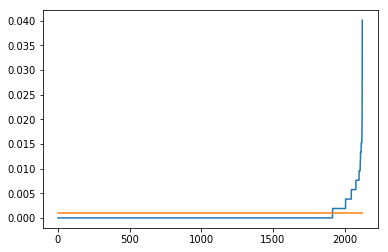

In [15]:
important_indices = np.where(clf.feature_importances_>0.001)[0]
plt.plot(sorted(clf.feature_importances_))
plt.plot(0.001*np.ones(len(clf.feature_importances_)))

(array([91., 40., 32., 22.,  8.,  2.,  5.,  5.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.0019084 , 0.00381679, 0.00572519, 0.00763359, 0.00954198,
        0.01145038, 0.01335878, 0.01526717, 0.01717557, 0.01908397,
        0.02099237, 0.02290076, 0.02480916, 0.02671756, 0.02862595,
        0.03053435, 0.03244275, 0.03435114, 0.03625954, 0.03816794,
        0.04007633]),
 <a list of 20 Patch objects>)

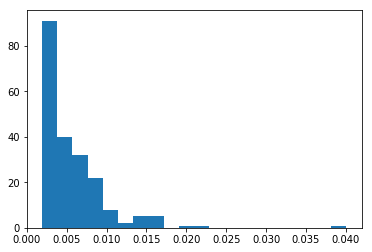

In [19]:
plt.hist(clf.feature_importances_[important_indices], 20)

In [20]:
important_indices

array([   0,   12,   14,   23,   34,   50,   63,   76,  121,  130,  380,
        393,  402,  440,  472,  535,  739,  805,  883,  939,  960, 1014,
       1018, 1019, 1029, 1034, 1038, 1042, 1050, 1056, 1156, 1157, 1158,
       1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1171,
       1174, 1178, 1180, 1182, 1186, 1188, 1189, 1190, 1193, 1194, 1196,
       1197, 1204, 1212, 1216, 1220, 1221, 1226, 1228, 1230, 1231, 1232,
       1233, 1235, 1236, 1238, 1241, 1244, 1246, 1247, 1252, 1258, 1259,
       1267, 1268, 1270, 1272, 1277, 1285, 1292, 1298, 1302, 1304, 1306,
       1309, 1323, 1451, 1459, 1477, 1480, 1481, 1492, 1494, 1497, 1501,
       1505, 1508, 1510, 1511, 1514, 1515, 1516, 1519, 1527, 1534, 1535,
       1538, 1539, 1540, 1542, 1548, 1549, 1550, 1552, 1554, 1596, 1598,
       1614, 1620, 1778, 1782, 1821, 1824, 1825, 1837, 1838, 1839, 1840,
       1842, 1844, 1849, 1852, 1857, 1862, 1879, 1880, 1882, 1883, 1884,
       1885, 1886, 1887, 1888, 1889, 1890, 1891, 18

In [25]:
n_date_features = 1156
X = np.concatenate([
    pd.read_csv('data/train_date.csv.zip', index_col=0, dtype=np.float16,
    usecols=np.concatenate([[0], important_indices[important_indices<n_date_features]+1])).values,
    pd.read_csv('data/train_numeric.csv.zip', index_col=0, dtype=np.float16,
    usecols=np.concatenate([[0], important_indices[important_indices>=n_date_features]+1-n_date_features])).values
], axis=1)
y = pd.read_csv('data/train_numeric.csv.zip', index_col=0, dtype=np.float16, usecols=[0, 969]).values.ravel()

/home/li/miniconda3/envs/kaggle/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [30]:
clf = XGBClassifier(max_depth=5, base_score=0.005, n_jobs=6)
cv = StratifiedKFold(y, n_folds=3)
preds = np.ones(y.shape[0])
for i, (train, test) in enumerate(cv):
    preds[test] = clf.fit(X[train], y[train]).predict_proba(X[test])[:,1]
    print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(y[test], preds[test])))
print(roc_auc_score(y, preds))

fold 0, ROC AUC: 0.720
fold 1, ROC AUC: 0.700
fold 2, ROC AUC: 0.695
0.7049673017060448


0.2137028722288989


/home/li/miniconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


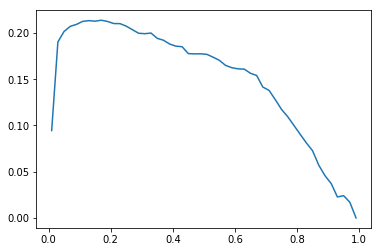

In [31]:
thresholds = np.linspace(0.01, 0.99, 50)
mcc = np.array([matthews_corrcoef(y, preds>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print(mcc.max())